In [34]:
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv')

In [36]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], random_state=0)


In [38]:
len(y_test)

1393

In [8]:
X_train.head()

872     Its going good...no problem..but still need li...
831     U have a secret admirer. REVEAL who thinks U R...
1273                                                Ok...
3314    Huh... Hyde park not in mel ah, opps, got conf...
4929    Just hopeing that wasn‘t too pissed up to reme...
Name: Message, dtype: object

In [9]:
vectorizer = CountVectorizer()


In [10]:
X_train_counts = vectorizer.fit_transform(X_train)

In [19]:
print(X_train_counts[0][0])

  (0, 3671)	1
  (0, 3085)	1
  (0, 3095)	1
  (0, 4658)	1
  (0, 5289)	1
  (0, 1521)	1
  (0, 6310)	1
  (0, 4588)	1
  (0, 4044)	1
  (0, 2625)	1
  (0, 6759)	1
  (0, 6959)	1
  (0, 911)	1
  (0, 2053)	1
  (0, 7128)	1


In [20]:
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [21]:
X_test_counts = vectorizer.transform(X_test)

In [22]:
y_pred = clf.predict(X_test_counts)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9877961234745154
Confusion Matrix:
 [[1206    2]
 [  15  170]]


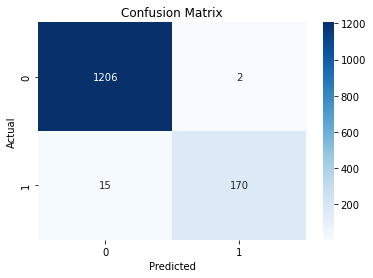

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()